In [137]:
import pandas as pd;
police_killings=pd.read_csv('police_killings.csv',encoding='ISO-8859-1');
print(police_killings.columns);
print(police_killings.head(3));

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')
                 name age gender raceethnicity     month  day  year  \
0  A'donte Washington  16   Male         Black  February   23  2015   
1      Aaron Rutledge  27   Male         White     April    2  2015   
2         Aaron Siler  26   Male         White     March   14  2015   

            streetaddress       city state    ...     share_hispanic  \
0            Clearview Ln  Millbrook    AL    ...                5.6   
1  300 block Iris Park Dr  Pineville    LA    ...                0.5   
2    22nd Ave and 5

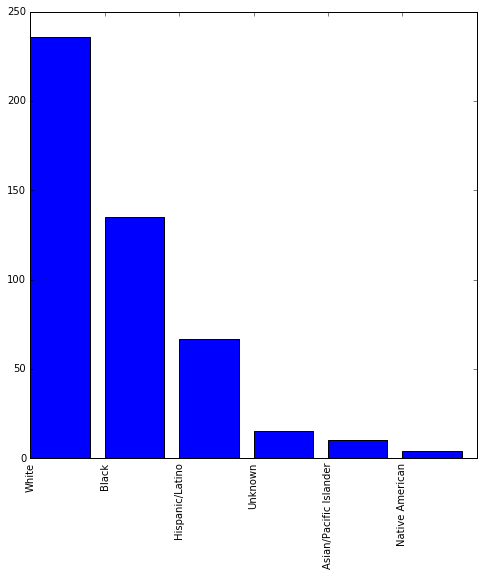

In [37]:
import matplotlib.pyplot as plt;
%matplotlib inline

fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)

race_count=police_killings["raceethnicity"].value_counts();

plt.bar(range(len(race_count)),race_count.tolist());

ax.set_xticklabels(race_count.index,rotation=90);


In [38]:
income=police_killings[police_killings['p_income']!='-']['p_income'].astype(int);

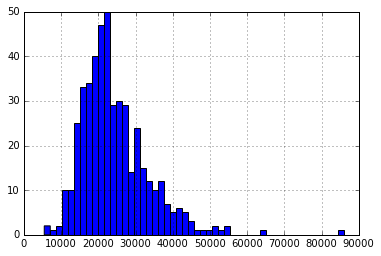

In [39]:
income.hist(bins=50);

In [86]:
state_pop=pd.read_csv('state_population.csv');
counts=police_killings["state_fp"].value_counts();
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})
states=states.merge(state_pop,on="STATE");
states['pop_millions']=states['POPESTIMATE2015']/1000000;
states['rate']=states['shootings']/states['pop_millions'];
states_sorted=states.sort_values('rate');
print(states_sorted[['rate','NAME']]);
states_sorted

        rate                  NAME
43  0.278483           Connecticut
22  0.546768          Pennsylvania
38  0.640226                  Iowa
6   0.656705              New York
29  0.735898         Massachusetts
42  0.751536         New Hampshire
45  0.752260                 Maine
11  0.855366              Illinois
12  0.861073                  Ohio
31  0.866350             Wisconsin
16  0.907023              Michigan
28  0.909050             Tennessee
15  0.995738        North Carolina
36  1.037759                Nevada
18  1.073602              Virginia
40  1.084523         West Virginia
25  1.092977             Minnesota
20  1.208518               Indiana
8   1.227951            New Jersey
35  1.343091              Arkansas
2   1.430596               Florida
44  1.487591  District of Columbia
9   1.534095            Washington
5   1.566346               Georgia
23  1.581888              Kentucky
13  1.643744              Missouri
21  1.646436               Alabama
14  1.664891        

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898
42,33,1,40,1,1,New Hampshire,1330608,1066610,80.2,1.330608,0.751536
45,23,1,40,1,1,Maine,1329328,1072948,80.7,1.329328,0.752260
11,17,11,40,2,3,Illinois,12859995,9901322,77.0,12.859995,0.855366
12,39,10,40,2,3,Ohio,11613423,8984946,77.4,11.613423,0.861073
31,55,5,40,2,3,Wisconsin,5771337,4476711,77.6,5.771337,0.866350


In [127]:
pk = police_killings[
    (police_killings["share_white"] != "-") & 
    (police_killings["share_black"] != "-") & 
    (police_killings["share_hispanic"] != "-")
]

pk["share_white"] = pk["share_white"].astype(float)
pk["share_black"] = pk["share_black"].astype(float)
pk["share_hispanic"] = pk["share_hispanic"].astype(float)

#pk=police_killings[police_killings['share_white']!='-' ];
#pk=pk[pk['share_black']!='-' ];
#pk=pk[pk['share_hispanic']!='-' ];
#pk['share_white'].astype(float);
#pk['share_black'].astype(float);
#pk['share_hispanic'].astype(float);

pk_low=pk[pk['state_fp'].isin(states_sorted['STATE'].iloc[0:10])];
pk_high=pk[pk['state_fp'].isin(states_sorted['STATE'].iloc[states_sorted.shape[0]-10:states_sorted.shape[0]])];
print(pk_low['share_white'])
print(pk_high['share_white'])

C:\Users\Richterhui\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Richterhui\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2      73.8
4      92.5
26     94.0
31      1.6
35     42.0
44     72.1
53      0.0
89      1.5
102    40.4
110    92.2
112    94.3
113    95.7
115    76.8
122     0.9
124    28.9
135     9.3
136    83.5
140    91.1
160    63.1
170    90.0
191    86.2
200    96.5
217    62.8
221     1.0
229    71.0
231    60.3
232    87.3
249    89.3
250     1.5
258    76.9
259    79.9
268    82.7
272    26.6
274    45.7
283    97.2
295    34.5
301    91.0
311    49.7
331    77.2
333    65.6
345    83.3
347    49.7
358    94.5
372    37.4
374     0.6
387    95.5
396     9.5
412    14.3
423    71.5
427    49.4
432    49.8
442    78.5
443    90.7
448    77.5
455    78.5
Name: share_white, dtype: float64
1      53.8
5       7.0
21     92.3
24     77.7
42     33.9
49     15.8
50     39.3
55     89.0
59     69.7
63     43.0
67     46.0
76     41.0
90     87.8
92     69.3
95     55.5
96     49.2
99     43.6
103    88.9
105    74.0
111    44.7
114    51.3
120    10.8
127    19.0
130    86.8
143    65.0
149   

C:\Users\Richterhui\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


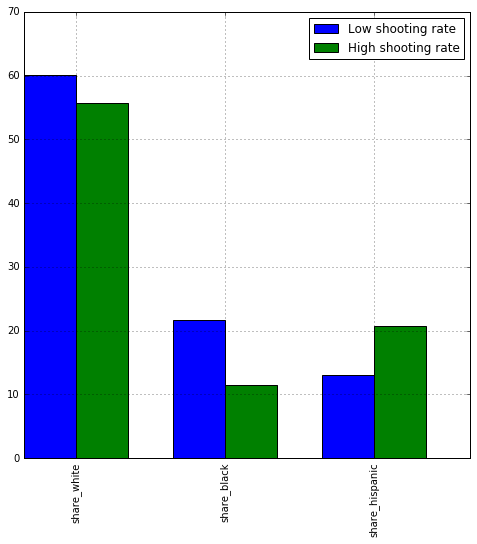

In [136]:
import numpy as np;
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)

columns = ["share_white", "share_black", "share_hispanic"]

#print(pk_low[columns].mean().tolist())
#print(pk_high[columns])

locs=np.arange(3)
bar_1=ax.bar(left=locs,height=pk_low[columns].mean().tolist(),width=0.35);

offset_locs=locs+0.35;
bar_2=ax.bar(left=offset_locs,height=pk_high[columns].mean().tolist(),width=0.35,color="green");

ax.set_xticklabels(columns,rotation=90);
ax.set_xticks(offset_locs);
plt.legend((bar_1, bar_2), ("Low shooting rate","High shooting rate"));
plt.grid();

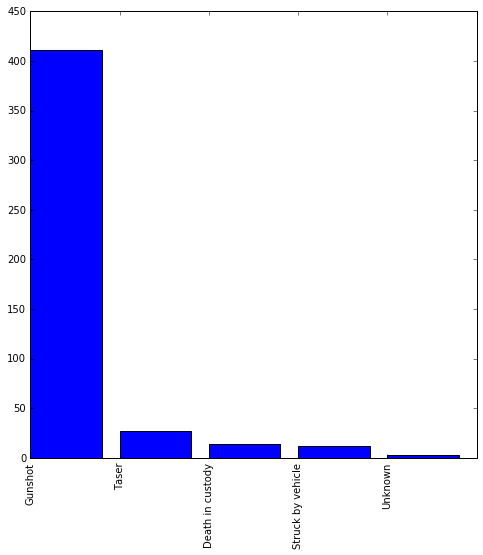

In [141]:
import matplotlib.pyplot as plt;
%matplotlib inline

fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)

race_count=police_killings["cause"].value_counts();

plt.bar(range(len(race_count)),race_count.tolist());

ax.set_xticklabels(race_count.index,rotation=90);